<a href="https://colab.research.google.com/github/John-G-Thomas/DS-Unit-2-Applied-Modeling/blob/master/module2-wrangle-ml-datasets/LS_DS_232_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 2*

---


# Wrangle ML datasets

- [ ] Continue to clean and explore your data. 
- [ ] For the evaluation metric you chose, what score would you get just by guessing?
- [ ] Can you make a fast, first model that beats guessing?

**We recommend that you use your portfolio project dataset for all assignments this sprint.**

**But if you aren't ready yet, or you want more practice, then use the New York City property sales dataset for today's assignment.** Follow the instructions below, to just keep a subset for the Tribeca neighborhood, and remove outliers or dirty data. [Here's a video walkthrough](https://youtu.be/pPWFw8UtBVg?t=584) you can refer to if you get stuck or want hints!

- Data Source: [NYC OpenData: NYC Citywide Rolling Calendar Sales](https://data.cityofnewyork.us/dataset/NYC-Citywide-Rolling-Calendar-Sales/usep-8jbt)
- Glossary: [NYC Department of Finance: Rolling Sales Data](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page)

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [2]:
# General imports.
import category_encoders as ce
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import pandas_profiling as pp
import numpy as np
import seaborn as sns
# Plotly imports.
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
# Scikit-learn imports.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import OrdinalEncoder

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Wrangled Project 2 dataset
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/John-G-Thomas/Projects/master/XGlobalTemperatures.csv')
print(df.shape)
df.head()

(3148, 7)


,Datetime,LandAverageTemperatureUncertainty,UpperBounds,LowerBounds,month,year,Average_Temperature
0,1750-01-01,3.574,6.608,-0.540,1,1750,3.034
1,1750-02-01,3.702,6.785,-0.619,2,1750,3.083
2,1750-03-01,3.076,8.702,2.550,3,1750,5.626
3,1750-04-01,2.451,10.941,6.039,4,1750,8.490
4,1750-05-01,2.072,13.645,9.501,5,1750,11.573


Your code starts here:

### 1)  Continue to clean and explore your data.

- My clean/wrangle function

In [4]:
#def wrangle(df):
  #df = df.copy()
  #Drop NaN and extra columns and index
  #df.dropna(subset=['Average_Temperature'], inplace=True)
  #df.set_index(pd.to_datetime(df['Datetime']), inplace = True)
  #df.drop('Unnamed: 0', axis=1, inplace=True)
  #df.drop('Datetime', axis=1, inplace=True)
  # Outliners
  #df = df[(df['Average_Temperature'] >= np.percentile(df['Average_Temperature'], 0.5))
  #&(df['Average_Temperature'] <= np.percentile(df['Average_Temperature'], 99.5))]
  # Split labels from feature matrix and target
  #y = df['Average_Temperature']
  #Return
  #return df, y

In [5]:
df.set_index(pd.to_datetime(df['Datetime']), inplace = True)
df.drop('Datetime', axis=1, inplace=True)

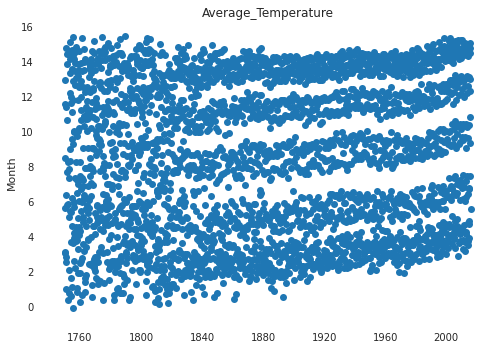

In [6]:
plt.plot(df['Average_Temperature'], 'o')
plt.title('Average_Temperature')
plt.ylabel('Month');
plt.show();

In [7]:
# Make Moving Averages

In [8]:
df['Yearly_SMA'] = df[['Average_Temperature']].rolling(window=12).mean()
df['Decade_SMA'] = df[['Average_Temperature']].rolling(window=120).mean()
df['Semicentennial_SMA'] = df[['Average_Temperature']].rolling(window=600).mean()
df['Centurie'] = df[['Average_Temperature']].rolling(window=1200).mean()

In [9]:
#Fixed Problem - Yearly moving  average 

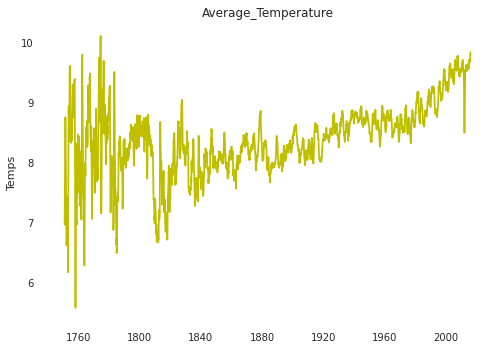

In [10]:
plt.plot(df['Yearly_SMA'], 'y')
plt.title('Average_Temperature')
plt.ylabel('Temps');
plt.show();

In [11]:
# Decade moving average

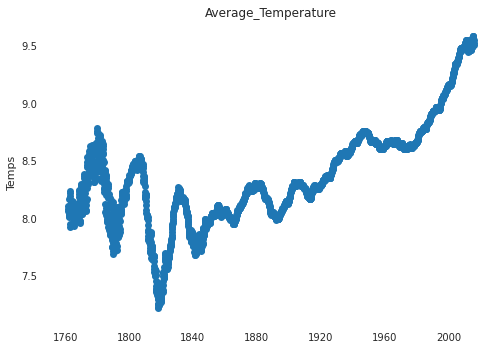

In [12]:
plt.plot(df['Decade_SMA'], 'o')
plt.title('Average_Temperature')
plt.ylabel('Temps');
plt.show();

In [13]:
# 50 Year moving average

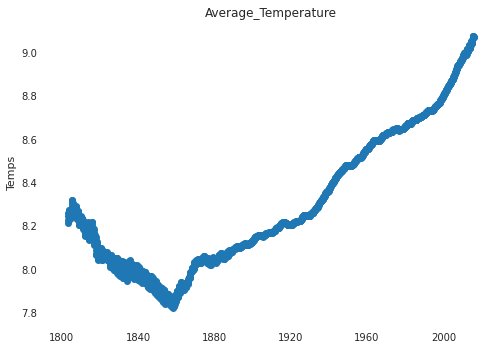

In [14]:
plt.plot(df['Semicentennial_SMA'], 'o')
plt.title('Average_Temperature')
plt.ylabel('Temps');
plt.show();

In [15]:
# Centurie Moving average 

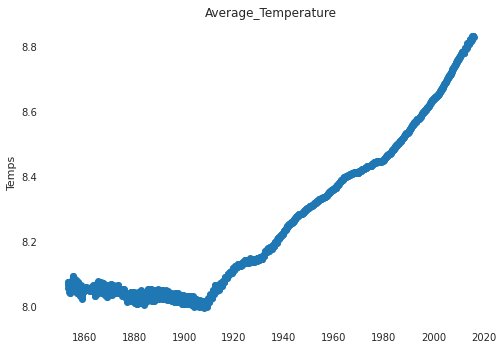

In [16]:
plt.plot(df['Centurie'], 'o')
plt.title('Average_Temperature')
plt.ylabel('Temps');
plt.show();

In [17]:
df.isnull().sum()

LandAverageTemperatureUncertainty       0
UpperBounds                             0
LowerBounds                             0
month                                   0
year                                    0
Average_Temperature                     0
Yearly_SMA                             11
Decade_SMA                            119
Semicentennial_SMA                    599
Centurie                             1199
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3148 entries, 1750-01-01 to 2015-12-01
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   LandAverageTemperatureUncertainty  3148 non-null   float64
 1   UpperBounds                        3148 non-null   float64
 2   LowerBounds                        3148 non-null   float64
 3   month                              3148 non-null   int64  
 4   year                               3148 non-null   int64  
 5   Average_Temperature                3148 non-null   float64
 6   Yearly_SMA                         3137 non-null   float64
 7   Decade_SMA                         3029 non-null   float64
 8   Semicentennial_SMA                 2549 non-null   float64
 9   Centurie                           1949 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 270.5 KB


In [19]:
df.describe()

,LandAverageTemperatureUncertainty,UpperBounds,LowerBounds,month,year,Average_Temperature,Yearly_SMA,Decade_SMA,Semicentennial_SMA,Centurie
count,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000,3137.000000,3029.000000,2549.000000,1949.000000
mean,0.913300,9.293713,7.467113,6.513977,1884.038119,8.380413,8.378304,8.362834,8.296740,8.262524
std,1.060012,4.233927,4.641216,3.449319,76.064469,4.313918,0.580877,0.439604,0.313262,0.239150
min,0.034000,0.988000,-5.965000,1.000000,1750.000000,-0.108000,5.572167,7.220025,7.821425,7.994273
25%,0.186000,5.399750,3.387000,4.000000,1819.000000,4.359750,8.040833,8.058408,8.043900,8.045645
50%,0.383000,9.397500,7.818000,6.500000,1884.000000,8.610500,8.386667,8.284450,8.207150,8.177263
75%,1.383000,13.351000,11.685500,10.000000,1950.000000,12.526250,8.717833,8.641700,8.580805,8.436043
max,7.880000,20.702000,15.277000,12.000000,2015.000000,15.462000,10.104417,9.583883,9.074065,8.831762


- Try to get carbon emmisions on the dataset if time

In [20]:
Country_Greenhouse_gas = pd.read_csv('https://pkgstore.datahub.io/core/co2-fossil-by-nation/fossil-fuel-co2-emissions-by-nation_csv/data/0f04181960a0a896ebaf6d8afb0b71a6/fossil-fuel-co2-emissions-by-nation_csv.csv')
print(Country_Greenhouse_gas.shape)
Country_Greenhouse_gas.head()

(17232, 10)


,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,1751,UNITED KINGDOM,2552,2552,0,0,0,0,0.0,0
1,1752,UNITED KINGDOM,2553,2553,0,0,0,0,0.0,0
2,1753,UNITED KINGDOM,2553,2553,0,0,0,0,0.0,0
3,1754,UNITED KINGDOM,2554,2554,0,0,0,0,0.0,0
4,1755,UNITED KINGDOM,2555,2555,0,0,0,0,0.0,0


In [21]:
print(df.shape)
df.tail()

(3148, 10)


,LandAverageTemperatureUncertainty,UpperBounds,LowerBounds,month,year,Average_Temperature,Yearly_SMA,Decade_SMA,Semicentennial_SMA,Centurie
Datetime,,,,,,,,,,
2015-08-01,0.072,14.827,14.683,8,2015,14.755,9.683750,9.580258,9.074065,8.831762
2015-09-01,0.079,13.078,12.920,9,2015,12.999,9.676083,9.567667,9.072718,8.831119
2015-10-01,0.102,10.903,10.699,10,2015,10.801,9.715333,9.547533,9.071170,8.830231
2015-11-01,0.119,7.552,7.314,11,2015,7.433,9.775333,9.521133,9.067745,8.828938
2015-12-01,0.100,5.618,5.418,12,2015,5.518,9.831000,9.505258,9.067175,8.828357


### 2) For the evaluation metric you chose, what score would you get just by guessing? 

In [22]:
#Pick a better target

In [23]:
df['Global_Warming'] = (df['Average_Temperature'] > 8.380413)
df[["Global_Warming"]] *= 1
y = df['Global_Warming']

In [24]:
X = df

In [25]:
#Baseline 1 means True and 0 means False 

In [26]:
y.value_counts(normalize=True)

1    0.51493
0    0.48507
Name: Global_Warming, dtype: float64

In [27]:
# Train test split based on time Industrial Revolution start of carbon emmision cutoff
cutoff = '1849-12-31'
X_train, y_train = X[X.index <= cutoff], y[y.index <= cutoff]
X_val, y_val = X[X.index >= cutoff], y[y.index > cutoff]

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X.shape)
print(y.shape)

(1157, 11)
(1157,)
(1991, 11)
(1991,)
(3148, 11)
(3148,)


In [29]:
# More accurate Baseline
y_train.value_counts(normalize=True)

0    0.51599
1    0.48401
Name: Global_Warming, dtype: float64

In [30]:
# Baseline for after industrial revolution
y_val.value_counts(normalize=True)

1    0.532898
0    0.467102
Name: Global_Warming, dtype: float64

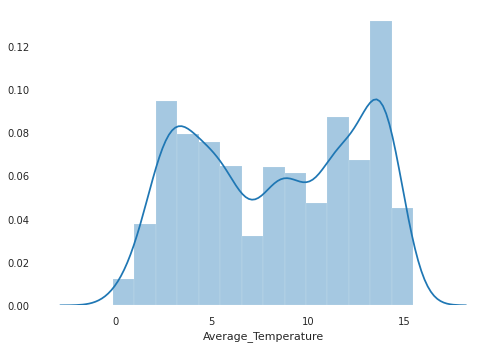

In [31]:
sns.distplot(X.Average_Temperature);

In [32]:
#Target is left Skeked 

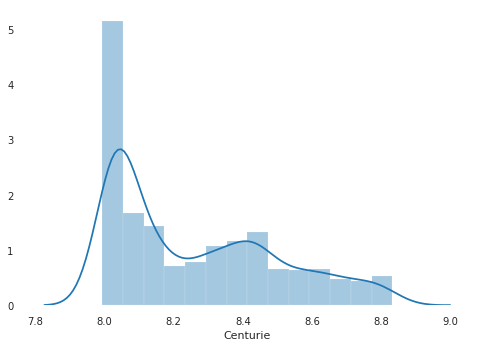

In [33]:
sns.distplot(X.Centurie);

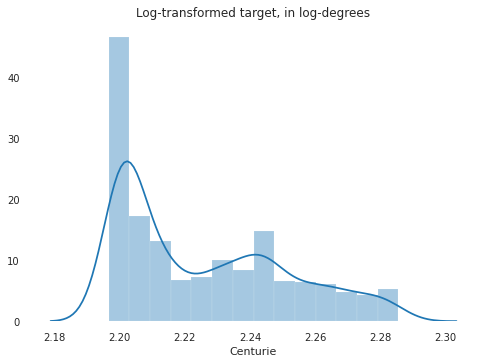

In [34]:
y_log = np.log1p(X.Centurie)
sns.distplot(y_log)
plt.title('Log-transformed target, in log-degrees');

In [35]:
# All the imports
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from category_encoders import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

### 3)Can you make a fast, first model that beats guessing?

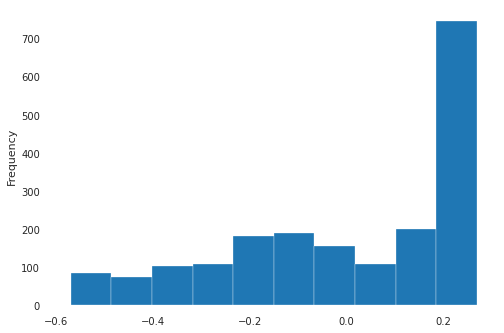

In [36]:
#Mean Absolute Error Baseline - Right skew means temperatures increasing
average = X.Centurie.mean()
MAE = average - X.Centurie
MAE.plot(kind='hist');

In [37]:
MAE = MAE.abs().mean()
MAE

0.2083867526952649

In [38]:
#standard deviation

In [39]:
X.Centurie.std()

0.23915015085809932

In [40]:
list(X.columns)

['LandAverageTemperatureUncertainty',
 'UpperBounds',
 'LowerBounds',
 'month',
 'year',
 'Average_Temperature',
 'Yearly_SMA',
 'Decade_SMA',
 'Semicentennial_SMA',
 'Centurie',
 'Global_Warming']

In [41]:
X.dropna(subset=['Centurie'], inplace=True)

In [42]:
X.isnull().sum()

LandAverageTemperatureUncertainty    0
UpperBounds                          0
LowerBounds                          0
month                                0
year                                 0
Average_Temperature                  0
Yearly_SMA                           0
Decade_SMA                           0
Semicentennial_SMA                   0
Centurie                             0
Global_Warming                       0
dtype: int64

In [43]:
#make and train our model 
#initiate the class
model_2f =  LinearRegression()
#make features and target
features = [
 'Yearly_SMA',
 'Decade_SMA',
 'Semicentennial_SMA',
 'Centurie',
 'Global_Warming']
target = ['Average_Temperature']
#make train data
x_train = X[features]
y_train = X[target]
#fit the model 
model_2f.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
#test train data
train_pred = model_2f.predict(x_train)

In [45]:
#Lots of improvent from yesterday beating guesing

In [46]:
r2 = r2_score(y_train,train_pred)
print(f' R2 score for train: {r2}')

 R2 score for train: 0.8075969912738209


In [48]:
y2=X.Global_Warming
print(X.shape)
X.head()

(1949, 11)


,LandAverageTemperatureUncertainty,UpperBounds,LowerBounds,month,year,Average_Temperature,Yearly_SMA,Decade_SMA,Semicentennial_SMA,Centurie,Global_Warming
Datetime,,,,,,,,,,,
1853-07-01,0.659,15.304,13.986,7,1853,14.645,8.061083,8.033942,7.901028,8.056038,1
1853-08-01,0.723,14.676,13.230,8,1853,13.953,8.115167,8.039425,7.904625,8.065137,1
1853-09-01,0.749,12.459,10.961,9,1853,11.710,8.134500,8.042625,7.901107,8.072326,1
1853-10-01,0.546,9.081,7.989,10,1853,8.535,8.103250,8.041067,7.890155,8.074750,1
1853-11-01,0.868,5.651,3.915,11,1853,4.783,8.119083,8.039700,7.872517,8.071661,0


In [49]:
#more baselines

In [50]:
y2.value_counts(normalize=True)

1    0.534633
0    0.465367
Name: Global_Warming, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y2, test_size=.2, random_state=42) 

In [52]:
y_train.value_counts(normalize=True)

1    0.530468
0    0.469532
Name: Global_Warming, dtype: float64

In [53]:
y_val.value_counts(normalize=True)

1    0.551282
0    0.448718
Name: Global_Warming, dtype: float64

### 4) Build Models

In [54]:
#Baseline of full df

In [55]:
y.value_counts(normalize=True)

1    0.51493
0    0.48507
Name: Global_Warming, dtype: float64

In [59]:
X_train, X_val, y_train, y_val = train_test_split(X, y2, test_size=0.2, 
                                                  stratify=y2, random_state=42)

In [60]:
print('Baseline accuracy:', y_train.value_counts(normalize=True).max())

Baseline accuracy: 0.5343168697883258


In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
#Instantiate - Log model 
log_model = LogisticRegression()
#Fit with training data
log_model.fit(X_train, y_train);

In [63]:
print('training accuracy:', log_model.score(X_train, y_train))
print('validation accuracy:', log_model.score(X_val, y_val))

training accuracy: 1.0
validation accuracy: 1.0


In [64]:
from sklearn.metrics import classification_report

In [66]:
print(classification_report(y_val, y_pred, target_names=df['Global_Warming']))

ValueError: ignored

### Check ROC